## Download data  

In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 23.7MB/s]


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 22.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## Load Data

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## Tiền xử lý dữ liệu dạng table

### Lấy label và chia bộ dữ liệu train/val

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

### Chuẩn hóa dữ liệu (Data Standardisation)

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

### Linear Regression - MSE

In [ ]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[9])
])

opt = tf.optimizers.SGD(learning_rate=0.1)
linear_model.compile(optimizer=opt, loss='mse',
                     metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])
# linear_history = linear_model.fit( X_train, y_train, epochs=100, validation_split = 0.2)
linear_history = linear_model.fit( X_train, y_train, validation_data=(X_val, y_val) ,epochs=100)

# Epoch 1/100
# 10/10 [==============================] - 3s 25ms/step - loss: 174.8569 - r_square: -1.9367 - mean_absolute_error: 10.6829 - val_loss: 18.3989 - val_r_square: 0.7183 - val_mean_absolute_error: 3.2208


Epoch 1/100
10/10 [==============================] - 3s 24ms/step - loss: 174.8569 - r_square: -1.9367 - mean_absolute_error: 10.6829 - val_loss: 18.3989 - val_r_square: 0.7183 - val_mean_absolute_error: 3.2208
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 14.8316 - r_square: 0.7509 - mean_absolute_error: 2.8350 - val_loss: 11.6993 - val_r_square: 0.8209 - val_mean_absolute_error: 2.5177
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 12.5773 - r_square: 0.7888 - mean_absolute_error: 2.6827 - val_loss: 11.3850 - val_r_square: 0.8257 - val_mean_absolute_error: 2.4029
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 12.1985 - r_square: 0.7951 - mean_absolute_error: 2.6657 - val_loss: 11.9029 - val_r_square: 0.8177 - val_mean_absolute_error: 2.4175
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 12.0640 - r_square: 0.7974 - mean_absolute_error: 2.5886 - val_loss: 13.5120 - val_r_square: 0.

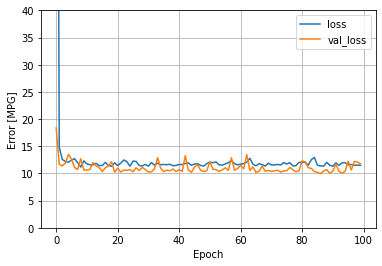

In [ ]:
plt.plot(linear_history.history['loss'], label='loss')
plt.plot(linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 40])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(linear_history.history)
hist['epoch'] = linear_history.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,11.576705,0.805570,2.605774,12.239604,0.812583,2.566532,95
96,11.642558,0.804464,2.583094,10.632712,0.837188,2.414308,96
97,11.495399,0.806936,2.581085,12.203035,0.813143,2.850347,97
98,11.531168,0.806335,2.592510,12.094419,0.814806,2.573145,98
99,11.494966,0.806943,2.591494,11.751684,0.820054,2.797981,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  11.181694030761719
Min val loss:  9.966848373413086
Min MAE:  2.54076886177063
Min val MAE:  2.352797746658325
Max r-squared loss:  0.8122045993804932
Max val r-squared loss:  0.8473840951919556
